In [2]:
import pandas as pd
 
datos = pd.read_csv('Position_Salaries.csv')
print (datos)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


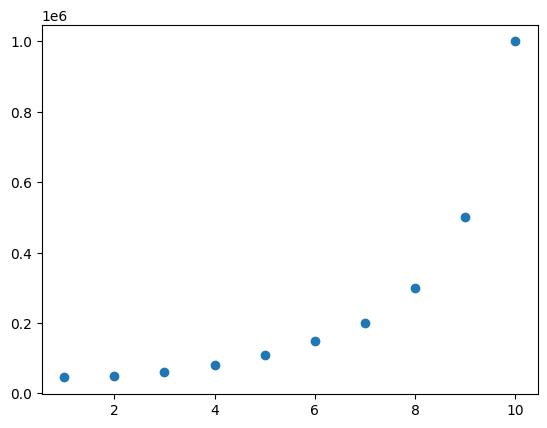

In [3]:
from matplotlib import pyplot as plt
 
x = datos['Level'].values.reshape(-1, 1) # necesitamos un array de 2D para SkLearn
y = datos['Salary'].values.reshape(-1, 1)
plt.scatter(x,y)

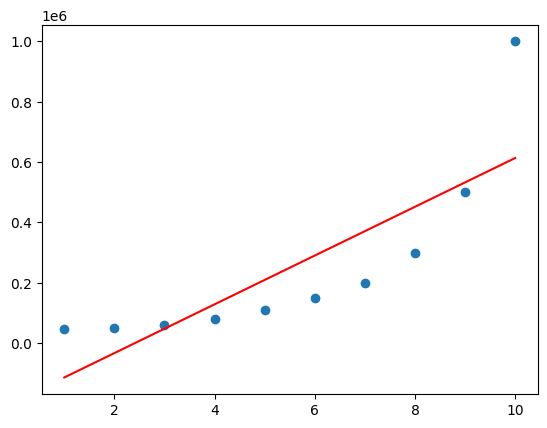

In [4]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

## Regresión lineal

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 163388.73519272613
R2: 0.6690412331929895


Vemos un mal ajuste ya que R2 esta lejano a 1.

## Regresión polinómica

In [6]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print(x)
print(x_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]]


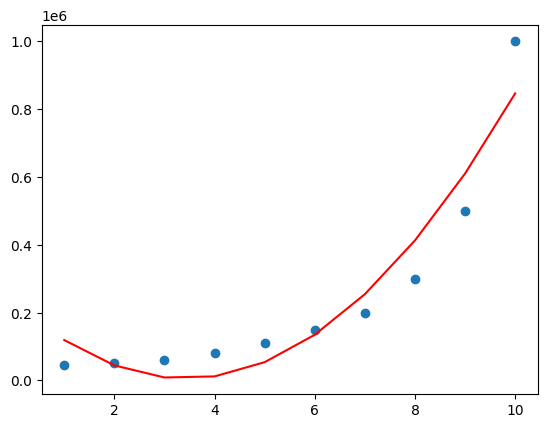

RMSE: 82212.12400451244
R2: 0.9162082221443943


In [7]:
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

Se puede observar que se ajusta de mejor forma que la regresión lineal ya que R2 está mas cercano a 1.

## De grado 4

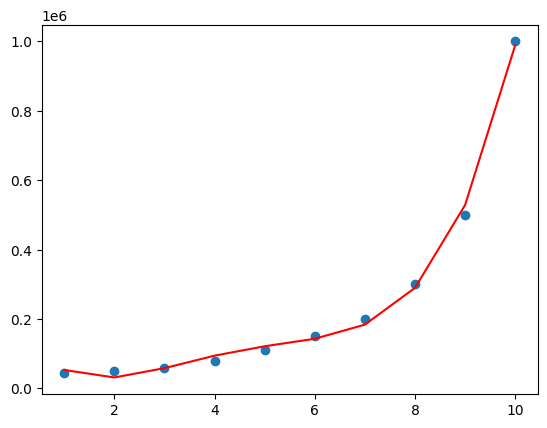

RMSE: 14503.234909626795
R2: 0.9973922891706614


In [8]:
poly = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly.fit_transform(x)
 
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

Aumentando el grado a grado 4, los datos se ajustan de mejor forma, pero esto nmo sgnifica que significa que si aumentamos a 100 el grado el ajuste sea perfecto, de hecho, puede producirse un sobreajuste. Además, como en este caso no tenemos datos de validación, es mucho mejor coger una función cuadrática en vez de grado 4, ya que al no tener estos datos, no podemos comprobar si nuestro modelo está sobreaprendiendo.